<a href="https://colab.research.google.com/github/choijiwoong/samples_for_colab/blob/main/%EB%AC%B810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

automl로서 사용할 모델은 SVC, RandomForest, LinearRegression이다. 
여러 feature를 가지는 wine 데이터셋으로 binary classification을 각 모델들로 진행한 후
roc_curve를 이용하여 성능을 비교할 것이다.

[1. 필요한 모듈의 추출 및 기본원리 설명]

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. SVM(Support Vector Machine)은 전통적인 이진 분류를 위한 기법 중 하나로, N차원의 공간을 (N-1)차원으로 나눌 수 있는 초평면을 찾는 분류 기법이다. 그냥 쉽게 예를 들면 분류하고자하는 공간에서 정확히 원하는 분류를 해내게끔 하는 경계를 찾는것이다. 아래는 2차원 공간에서 1차원 경계로 나눈 예시이다.

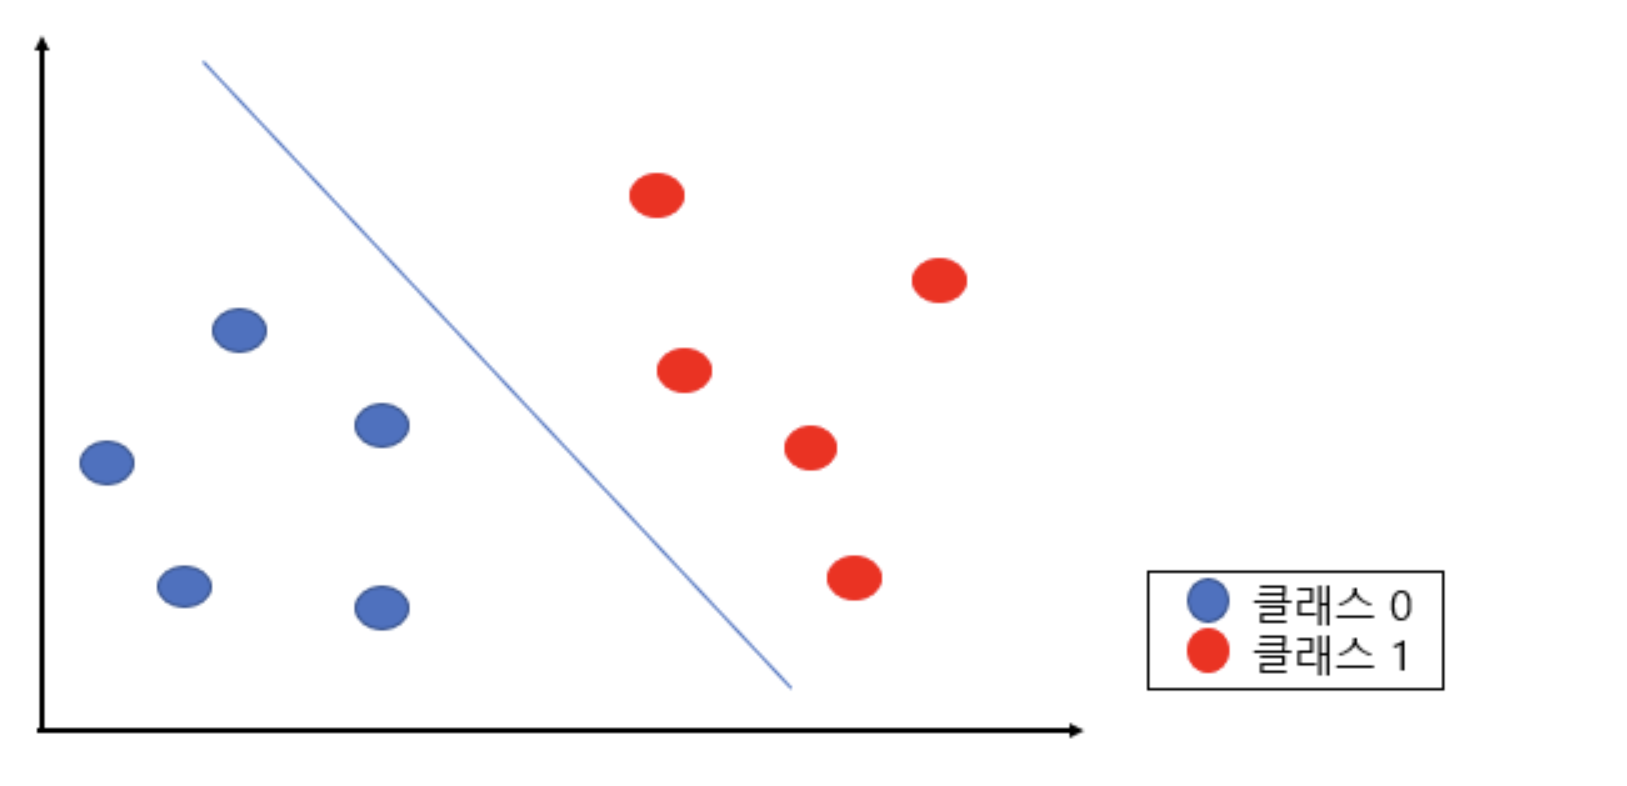

SVM에서 찾고자하는 (N-1)차원의 최적의 경계를 논하기 앞서서, 필요한 용어정리를 해보자. 우선 마진(margin)이란 각 클래스 말단에 위치한 데이터들 사이의 거리를 의미한다. SVM의 목표는 이 margin을 최대화시킬 수 있는 경계를 찾는것이라고도 생각할 수 있다.
 support vector는 마진에서 가장 가까이 위치해있는 각 클래스의 데이터를 의미하며, 이들의 위치에 따라 SVM에서 구하고자하는 경계(초평면)의 위치가 달라지기 때문에 서포트 벡터라는 이름이 붙게 되었다.

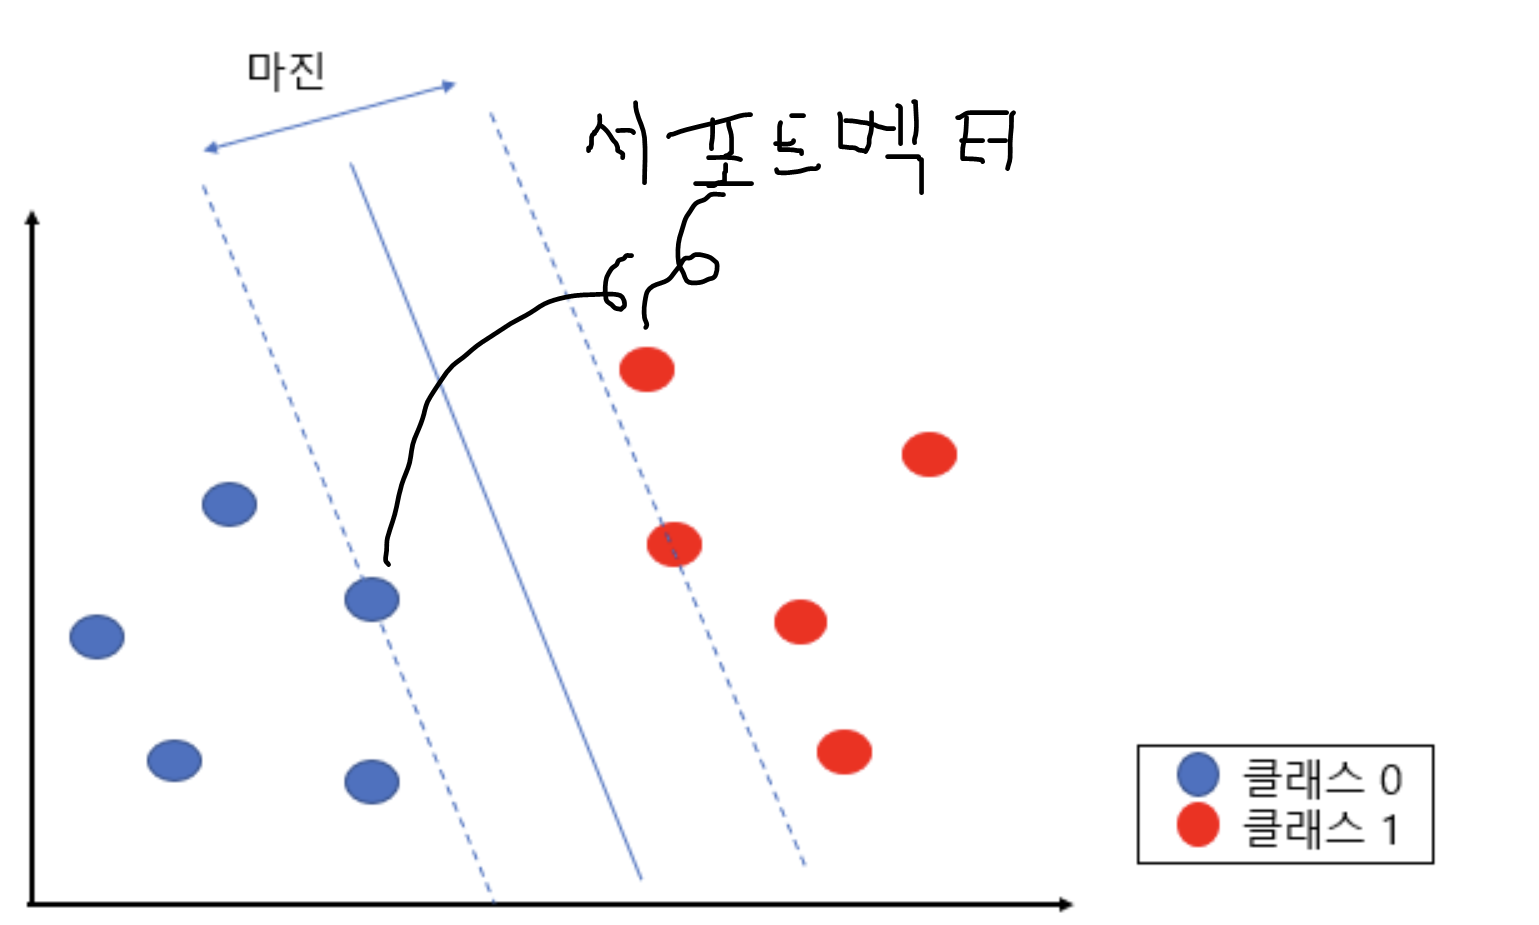

SVM은 크게 Linear SVM과 non-linear SVM으로 구분된다.

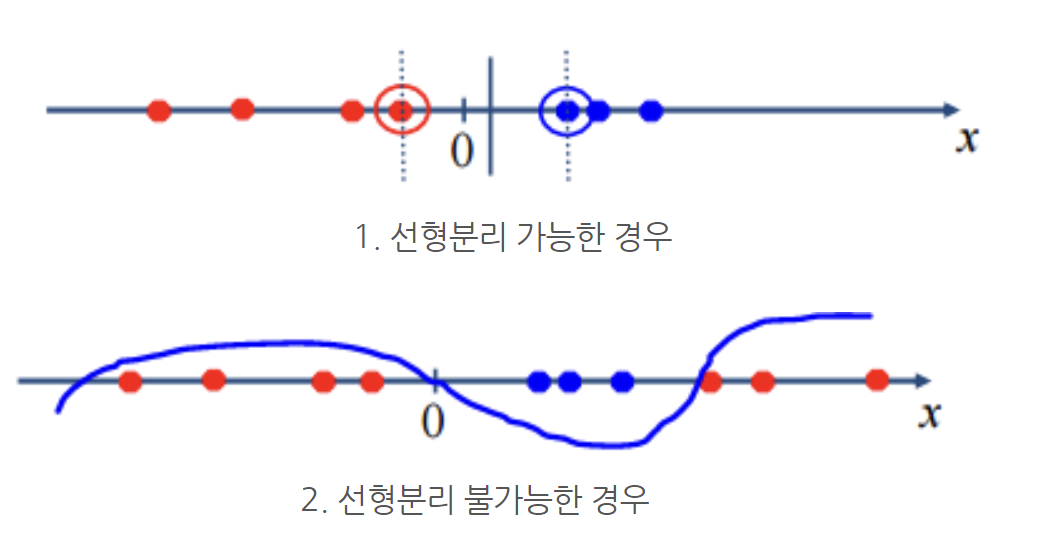

우선 linear SVM은 hard margin, soft margin으로 방법이 구분된다.
hard margin은 말 그대로 단 하나의 오차도 없이 깔끔히 모든 데이터가 마진의 바깥쪽에 위치하여 예외없이 구분이 잘 되게하는것을 목표로 한다.
soft margin은 hard margin과 달리 어느정도의 오분류를 허용하는 방식으로서 이를 구분하기 위해 결정경계로부터 잘못 분류된 데이터의 거리를 측정하기 위해 slack variable을 사용한다.

non-linear SVM은 선형분리가 불가능한 입력 공간을 선형분리가 가능한 고차원 특성공간으로 보내 선형분리를 진행한 뒤 기존의 입력공간으로 변환하여 비선형 분리를 수행한다. 이때 입력 공간을 특성 공간으로 변환하기 위해 mapping function을 사용하는데, 문제점이 이렇게 고차원의 특성공간으로 변환 시 계산량의 증가가 지수적이라는 단점이 존재한다. 고로 이를 완화하기위해 실제 데이터의 특성을 확장하지 않지만 확장한 것 처럼 만들어내는 kernel trick을 사용한다. kernel trick은 확장된 특성 공간에서의 두 벡터내적을 계산한다. kernel function으로는 기본적으로 linear를 사용하며 그 외에 사용자가 직접 차수를 정해 확장시키는 polynomial, radial basis, tanh를 적용하는 sigmoid등이 있는데 gaussian radial basis function이 가장 많이 사용된다. 이 함수는 입력 공간을 무한대의 특성공간으로 보내는 방식이다. RBF에서는 Gamma라는 파라미터를 가지게되는데 gamma가 커질수록 결정 경계 곡률이 커져 과대적합이 되며, 작아질수록 결정경계 곡률이 작아져 과소적합이 된다.

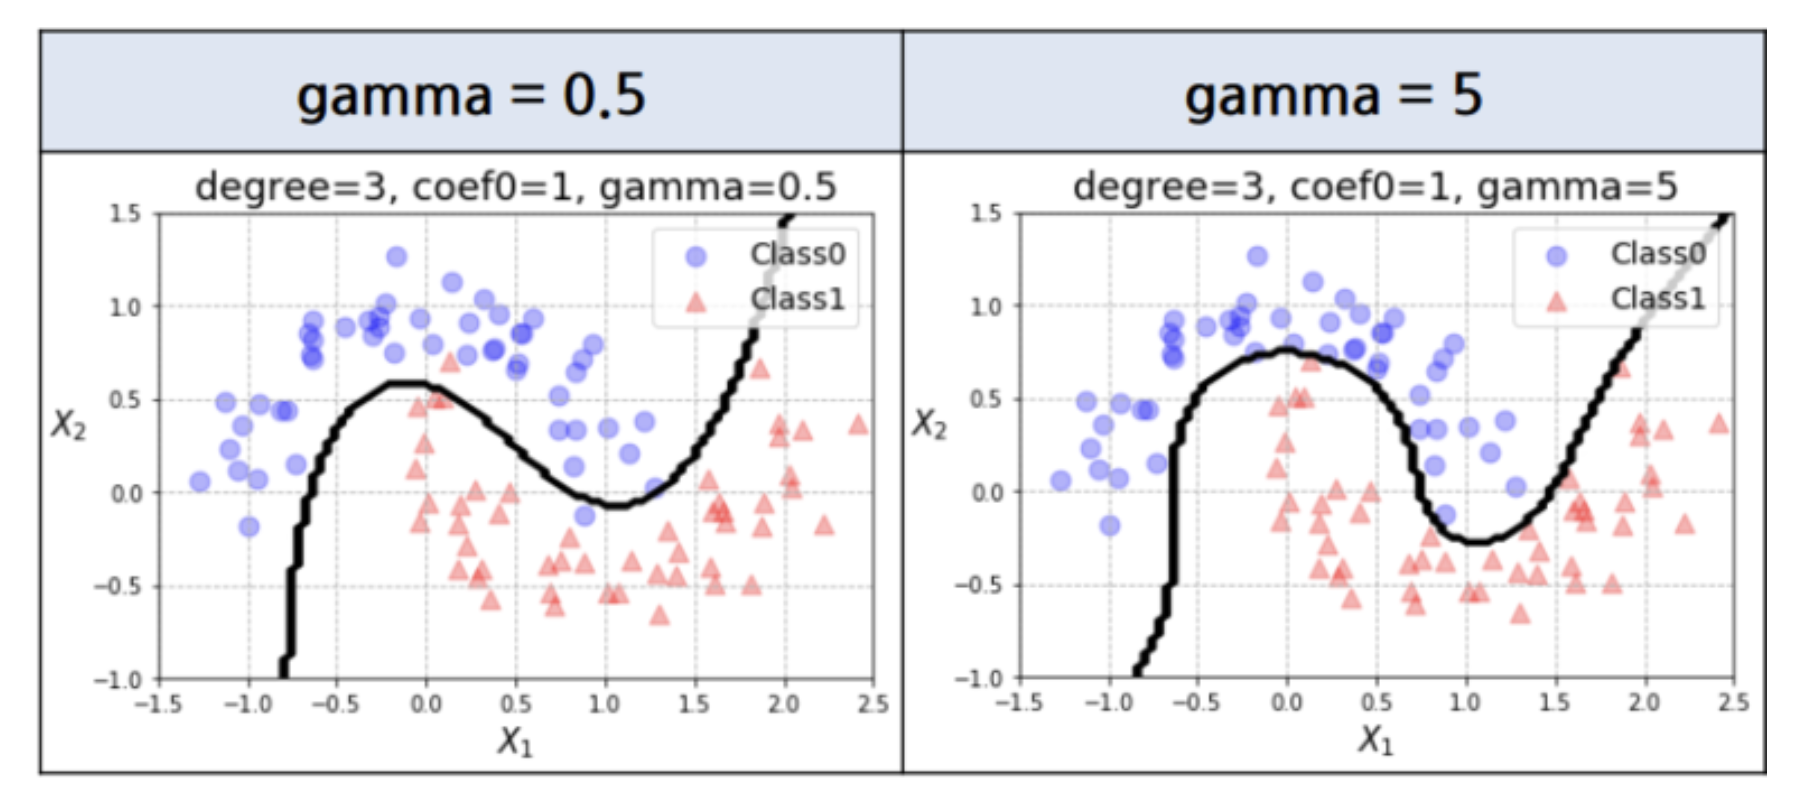

2. Decision Tree(의사결정 나무)는 한번 분리를 진행해서 변수를 구분하는 영역을 만들어 원하는 class값을 얻는 모델이다. 즉 위의 SVM은 N-1차원의 경계를 얻고자한 반면 Decision Tree는 특정 feature에 대한 질문을 통해 데이터를 분류하여 클래스의 경계를 얻는 모델이다. 아래의 그림에서 동그라미는 root node 네모상자는 leaf node라고 부른다.

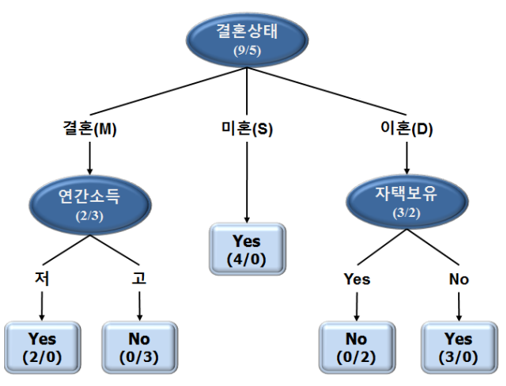

Decision Tree는 분류문제 뿐만이 아니라 회귀에서도 사용되는데, 특정 feature(root node)의 평균값을 기준으로 leaf node를 구분하여 사용할 수 있다. 구체적인 분리 기준을 설명하기에 앞서 순수도, 불순도의 대한 개념을 짚고 넘어가자.

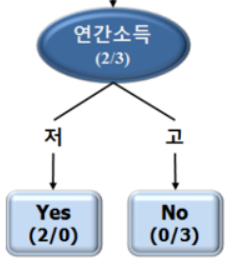

순수도는 목표변수가 특정 범주에 속해 있는 정도를 의미하고, 불순도는 이의 반대이다. 위의 예시를 보면 연간소득 root node는 실제 Yes와 No가 2개, 3개로 섞여있는 반면 아래의 Yes와 No는 정확히 각각 Yes 2개, No 3개로 분류되었다. 이 경우 leaf node의 순수도가 root node의 순수도보다 높다고 표현한다. 다음으로 불순도를 측정하기위해 엔트로피를 사용하는데, 식은 아래와 같다.

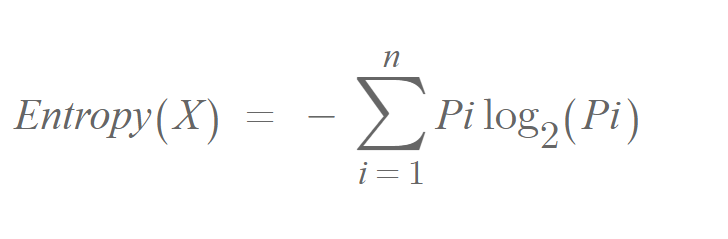

여기서 Pi는 i범주에 속하는 데이터의 비율이다. decidion tree의 목적은 순수도는 높게, 불순도는 낮게, 즉 엔트로피를 적게 만다는 것이 목표이다.
처음 Decision Tree 예시 그림에서 결혼상태를 기준으로 하여 결혼, 미혼, 이혼 노드로 분류되었을 때 실제로 엔트로피가 줄어들었는지를 계산해보면 아래와 같다.

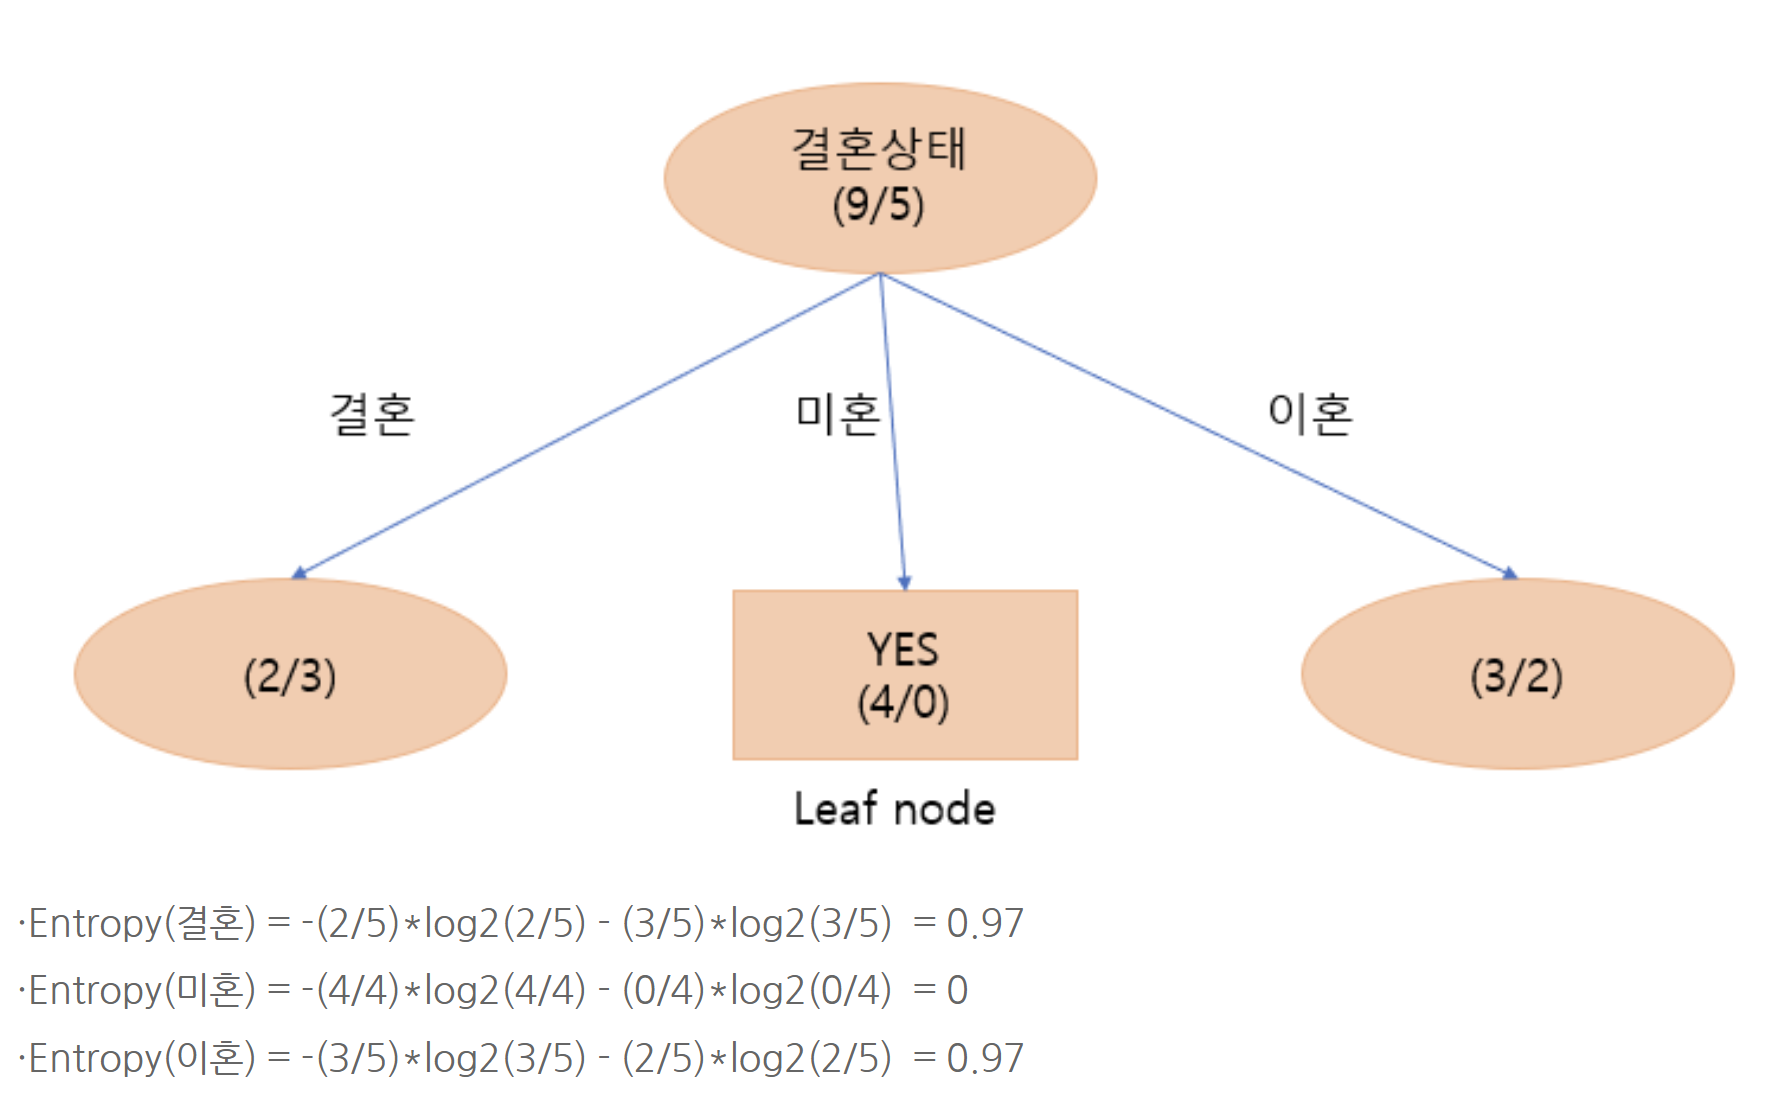

기존 결혼상태의 엔트로피가 0.940인 반면 leaf node의 엔트로피가 결혼노드는 증가했고 미혼노드는 감소, 이혼노드는 증가했다. 이렇게 몇몇노드는 감소하고 몇몇노드는 증가한 경우 실제로 엔트로피가 감소하는 방향으로 decision tree의 leaf node가 구분된 것인지 평가하기가 어려운데, 이때 Information Gain의 개념이 등장한다.

Information gain은 분류를 통해 얻은 정보의 양을 의미하는 것으로 decision tree의 분류기준으로는 엔트로피, 불순도, 순수도가 아닌 정보의 양 Information gain을 사용한다. 이는 아래와 같다. T는 집합 내 데이터 수, freq(c, T)는 T내의 class c의 수, Info는 정보량을 의미하고 Gain(X)는 정보획득량을 의미한다. 공식은 잘 이해 못했지만 뜻은 각 leaf node들의 엔트로피의 가중평균값이 정보량이다.

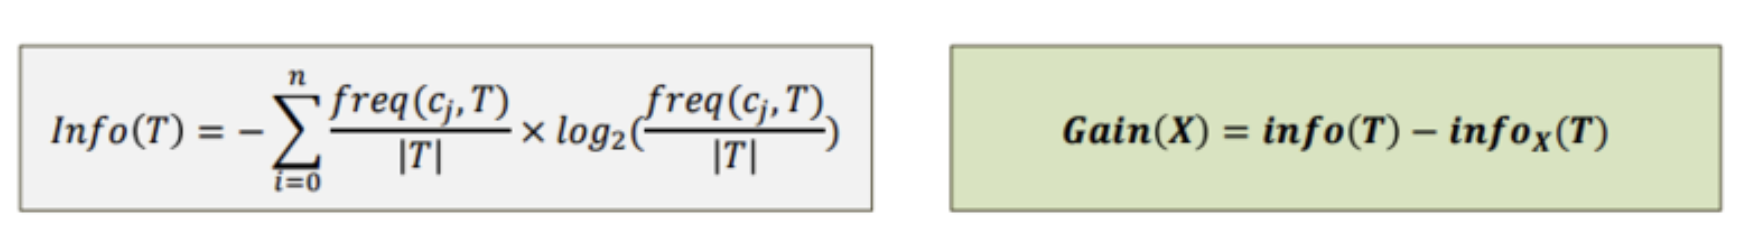

이 공식을 통해 다시 위의 결혼상태부분의 정보획득량을 구해보면, 우선 결혼상태 노드는 기존의 엔트로피값이 정보량이기에 0.940이고 아래 leaf node들의 정보량은 (5/14)*Entropy(결혼)+(4/14)*Entropy(미혼)+(5/14)*Entropy(이혼)=0.693이다. 이때의 정보 획득량은 root node의 정보량에서 leaf node의 정보량을 뺀 값인 0.247이 된다. 이런 방식으로 정보획득량을 계산해보았을때 더 높은 정보 획득량을 얻는 feature를 사용하여 decision tree의 분리속성을 결정하게 된다.

추가적으로 엔트로피 외에 불순도를 계산하기 위한 공식으로 지니 인덱스가 있으며 아래의 Pj는 j범주 데이터의 비율이다.

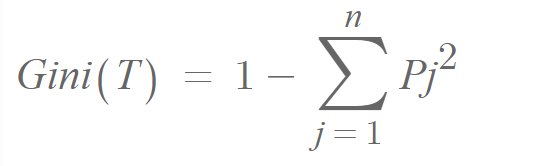

[2. 데이터의 이해, 모델의 학습]

사용할 데이터는 와인의 분류 데이터로, 아래의 12가지 feature정보를 가지는 경우 3가지 중 어떤 와인의 종류에 속하는지를 구분하는 데이터셋이다. 이를 이진분류문제로 바꾸어 처리할 예정이다(SVM과의 비교를 위함)

In [ ]:
X, y=load_wine(return_X_y=True)
print(f"Sample data X(size: {len(X[0])}):\n {X[0]}")#size: 13
print("Sample data y\n", y[0])
y=y==2#to binary classification

Sample data X(size: 13):
 [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Sample data y
 0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)#0.25 default split

svc=SVC(random_state=42)
svc.fit(X_train, y_train)

rfc=RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

SVM는 범주형 변수인 경우 SVC(Support Vector Classifier), 연속형 변수인 경우 SVR(Support Vector Regression)을 사용한다. SVC는 Margin안의 점들의 error와 아예 반대방향으로 오분류된 점들의 error을 기준으로 model cost를 계산한다. 즉 hard margin의 방법에 속한다.

RandomForestClassifier는 수많은 Decision Tree를 Ensemble한 것이다. 일반적으로 많은 요소들을 기반으로 예측을 수행하게 된다면 특정 요소에 오버피팅이 일어날 가능성이 높다는 문제를 해결하기 위해 일부 Feature를 랜덤으로 선택해 여러개의 Decision Tree를 만드는 것이다. 선택된 일부 특징을 이용하여 가장 잘 예측할 수 있는 트리를 구성하는데, 인자로 전달하는 n_estimators값이 ensemble하기위해 생성할 작은 decision tree의 개수이다.

[3. 모델의 평가]

roc_curve는 binary classificator의 성능을 측정하기 위한 도구로, FPR(False Positive Rate_실제 음성인데 양성으로 분류)에 대한 TPR(True Positive Rate_실제 양성인데 양성으로 잘 분류)의 곡선이다. 이전에 기본 개념을 먼저 정리해보자. 

TN, FP, FN, TP가 평가지표의 기본이 되는데 True positive는 실제 True를 True로 예측, True negative는 실제 False를 False로 예측, False positive는 실제 False를 True로 예측, False negative는 실제 True를 False로 예측한 것이다. 이해하기 쉽게 설명하면 positive, negative는 모델의 예측값(True, False)이고 앞의 True False는 그 예측이 옳은지 틀린지를 의미하는 것이다. 추가적인 지표로 T*/all을 나타내는 정확도, TP/(TP+FP)의 정밀도, TP/(TP+FN)의 재현율이 있다.

ROC Curve는 X축을 FPR(False Positive Rate_특이도_false->true), Y축을 TPR(True Positive Rate_민감도_true->true)로 설정한 곡선으로, 곡선이 원점에서 멀수록 성능이 좋음을 의미한다. 이때 TPR을 높이다보면 (아무래도 상관관계가 있다보니) FPR도 같이 높아지는 비례적 특성이 있기에 특정 기준 threshold를 바꾸어가면서 TPR과 FPR을 측정해야한다.
AUC는 ROC curve가 원점과 멀어질수록 성능이 좋다는 것을 이용하여 정량적인 점수로 나타내기 위한 것으로 ROC curve의 아랫 면적의 크기를 의미한다. 이 값이 1에 가까울 수록 좋다.

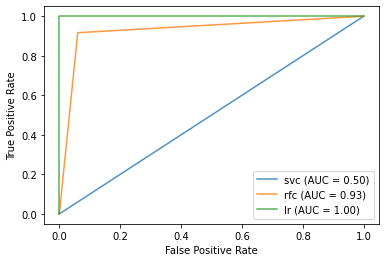

In [ ]:
from sklearn import metrics

ax = plt.gca()#기존의 축을 가져오거나 새로이 만든다. (plot통합용)

fpr, tpr, thresholds=metrics.roc_curve(y_test, svc.predict(X_test))#결과를 통해 roc_curve에 사용될 FPR, TPR, threshold를 얻는다.
roc_auc=metrics.auc(fpr, tpr)#FPR과 TPR을 사용하여 AUC점수를 계산하고
svc_disp=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='svc')#가시화한다.
svc_disp.plot(ax=ax, alpha=0.8)

fpr, tpr, thresholds=metrics.roc_curve(y_test, rfc.predict(X_test))
roc_auc=metrics.auc(fpr, tpr)
rfc_disp=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='rfc')
rfc_disp.plot(ax=ax, alpha=0.8)

fpr, tpr, thresholds=metrics.roc_curve(y_test, lr.predict(X_test))
roc_auc=metrics.auc(fpr, tpr)
lr_disp=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='lr')
lr_disp.plot(ax=ax, alpha=0.8)

plt.show()

위의 결과를 비교해보았을때, Wine의 종류를 binary classification하는데에 SVC, RFC, LR중에 Linear Regression의 AUC 점수 1로 가장 우수한 결과를 얻었다는 것을 알 수 있다.